In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Task-3/Housing.csv')

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# --- Basic Exploration ---
print("Dataset shape:", df.shape)
print("\nChecking for missing values:")
print(df.isnull().sum())

# --- Preprocessing for this specific dataset ---

# 1. Convert binary 'yes'/'no' columns to 1s and 0s
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

# 2. Handle the 'furnishingstatus' column using One-Hot Encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("Data has been fully preprocessed:")
display(df.head())


# 3. Define our features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

print("\nFeatures (X) and target (y) are defined.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Dataset shape: (545, 13)

Checking for missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Data has been fully preprocessed:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,0,0,0,0,0,2,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,0
2,12250000,9960,3,2,2,0,0,0,0,0,2,0
3,12215000,7500,4,2,2,0,0,0,0,0,3,0
4,11410000,7420,4,1,2,0,0,0,0,0,2,0



Features (X) and target (y) are defined.
Shape of X: (545, 11)
Shape of y: (545,)


In [6]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split into training and testing sets.
X_train shape: (436, 11)
X_test shape: (109, 11)
y_train shape: (436,)
y_test shape: (109,)


In [ ]:
# Create a Linear Regression model instance
model = LinearRegression()

# Fit the model to the training data
# model 'learns' the relationship between the features and the price
model.fit(X_train, y_train)

print("Linear Regression model fitted successfully.")

Linear Regression model fitted successfully.


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred)

print(f"Model Performance on Test Set:")
print(f"  Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"  Mean Squared Error (MSE): {mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"  R-squared (R²): {r2:.2f}")

Model Performance on Test Set:
  Mean Absolute Error (MAE): $1,127,483.35
  Mean Squared Error (MSE): 2,292,721,545,725.36
  Root Mean Squared Error (RMSE): $1,514,173.55
  R-squared (R²): 0.55


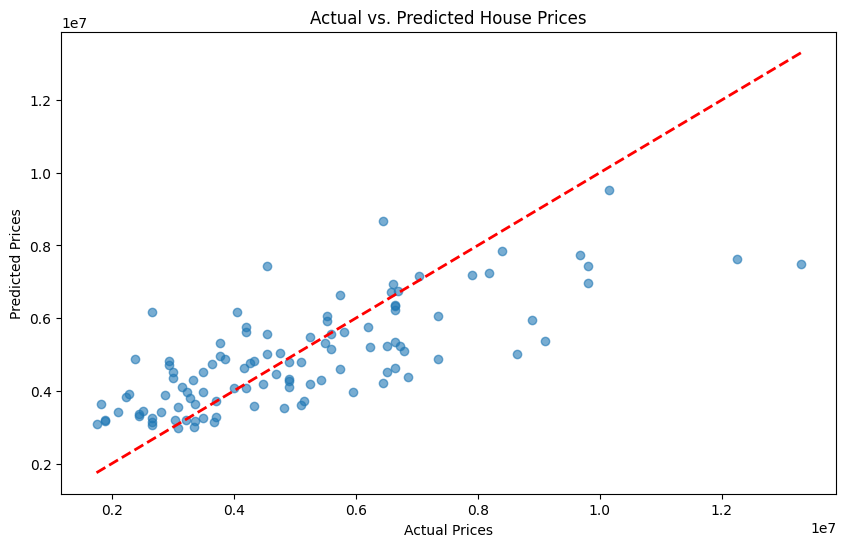


Model Coefficients:
                  Coefficient
bathrooms        1.185732e+06
stories          4.951008e+05
parking          3.376608e+05
bedrooms         1.512468e+05
area             3.088670e+02
guestroom        0.000000e+00
mainroad         0.000000e+00
basement         0.000000e+00
hotwaterheating  0.000000e+00
airconditioning  0.000000e+00
prefarea         0.000000e+00


In [9]:
# --- Visualize Predictions vs. Actual Values ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

# --- Interpret the Coefficients ---
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))